In [16]:
from vCRM.crm_utils import xml_dict, generate_crm_config_from_sbml, spec_to_antimony_inputs, generate_antimony_crm_multi, run_basico_simulation_from_antimony, plot_species_and_resources, save_antimony_as_sbml
from process_bigraph import ProcessTypes, Composite, register_types
from vCRM.classical_CRM_v2 import CRM, plot_crm_simulation, get_crm_emitter
from process_bigraph.emitter import gather_emitter_results

In [17]:
# Load model files
xml_files = xml_dict("/Users/edwin/Downloads/yeast/")

In [18]:
# Generate config
crm_config, species_names, resource_names = generate_crm_config_from_sbml(xml_files)

In [19]:
crm_config

{'species_number': 1,
 'resource_number': 5,
 'tau': {'iMM904': 1.0},
 'maintenance': {'iMM904': 0.1},
 'resource_value': {'EX_glc__D_e': 1.0,
  'EX_nh4_e': 1.0,
  'EX_o2_e': 1.0,
  'EX_pi_e': 1.0,
  'EX_so4_e': 1.0},
 'resource_uptake_rate': {'iMM904': {'EX_glc__D_e': np.float64(0.7304499473642933),
   'EX_nh4_e': np.float64(0.1176775972396),
   'EX_o2_e': np.float64(0.14608998947285864),
   'EX_pi_e': np.float64(0.004157067320091491),
   'EX_so4_e': np.float64(0.0016253986031567061)}},
 'carrying_capacity': {'EX_glc__D_e': 10.0,
  'EX_nh4_e': 10.0,
  'EX_o2_e': 10.0,
  'EX_pi_e': 10.0,
  'EX_so4_e': 10.0},
 'uptake_rate': {'EX_glc__D_e': 0.5,
  'EX_nh4_e': 0.5,
  'EX_o2_e': 0.5,
  'EX_pi_e': 0.5,
  'EX_so4_e': 0.5},
 'resource_mode': 'logistic'}

In [20]:
# Define initial state
initial_state = {
    "species": {sp: 1.0 for sp in species_names},
    "concentrations": {r: 5.0 for r in resource_names},
}

# Create the CRM spec dictionary
crm_spec = {
    "crm": {
        "_type": "process",
        "address": "local:CRM",
        "config": crm_config,
        "inputs": {
            "species": ["species"],
            "concentrations": ["concentrations"]
        },
        "outputs": {
            "species_delta": ["species"],
            "concentrations_delta": ["concentrations"]
        },
        "interval": 1.0,
    }
}


# Merge with initial state
spec = {**crm_spec, **initial_state}

state_keys = ["species", "concentrations", "global_time"]
emitter_step = get_crm_emitter(state_keys)

# Add to your composite spec
spec["emitter"] = emitter_step


# Register types and processes
core = ProcessTypes()
core=register_types(core)
core.register_process("CRM", CRM)

sim = Composite({
    "state": spec,
}, core=core)
sim.run(200)

In [21]:
spec

{'crm': {'_type': 'process',
  'address': 'local:CRM',
  'config': {'species_number': 1,
   'resource_number': 5,
   'tau': {'iMM904': 1.0},
   'maintenance': {'iMM904': 0.1},
   'resource_value': {'EX_glc__D_e': 1.0,
    'EX_nh4_e': 1.0,
    'EX_o2_e': 1.0,
    'EX_pi_e': 1.0,
    'EX_so4_e': 1.0},
   'resource_uptake_rate': {'iMM904': {'EX_glc__D_e': np.float64(0.7304499473642933),
     'EX_nh4_e': np.float64(0.1176775972396),
     'EX_o2_e': np.float64(0.14608998947285864),
     'EX_pi_e': np.float64(0.004157067320091491),
     'EX_so4_e': np.float64(0.0016253986031567061)}},
   'carrying_capacity': {'EX_glc__D_e': 10.0,
    'EX_nh4_e': 10.0,
    'EX_o2_e': 10.0,
    'EX_pi_e': 10.0,
    'EX_so4_e': 10.0},
   'uptake_rate': {'EX_glc__D_e': 0.5,
    'EX_nh4_e': 0.5,
    'EX_o2_e': 0.5,
    'EX_pi_e': 0.5,
    'EX_so4_e': 0.5},
   'resource_mode': 'logistic'},
  'inputs': {'species': ['species'], 'concentrations': ['concentrations']},
  'outputs': {'species_delta': ['species'],
   'co

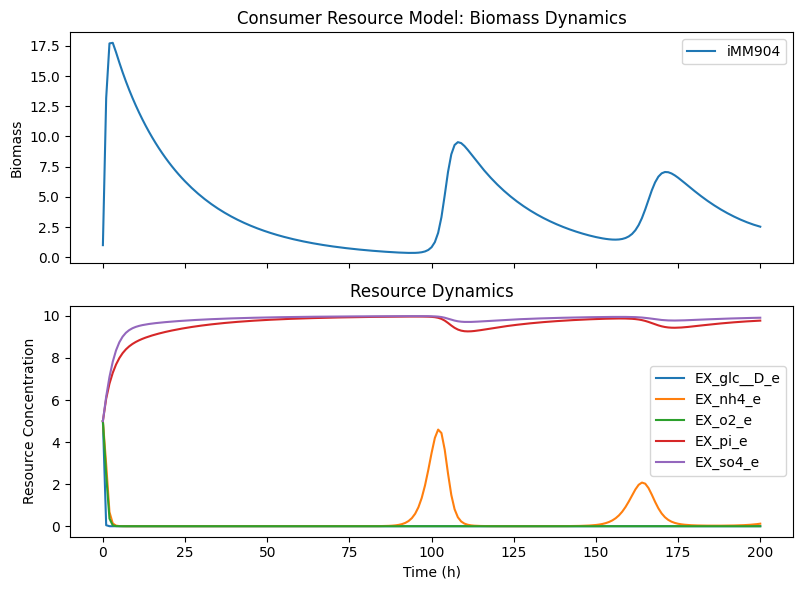

In [22]:
results = gather_emitter_results(sim)[('emitter',)]
plot_crm_simulation(results)

In [23]:
species_names, resource_names, params, initial_N, initial_R, mode = spec_to_antimony_inputs(spec)

ant_model_str = generate_antimony_crm_multi(
    species_names=species_names,
    resource_names=resource_names,
    params=params,
    initial_N=initial_N,
    initial_R=initial_R,
    resource_mode=mode
)


# result_df = run_basico_simulation_from_antimony(ant_model_str)
# save_antimony_as_sbml(ant_model_str, filename="vivarium_model.xml")

In [24]:
ant_model_str

"model crm_named()\n\n    species iMM904, EX_glc__D_e, EX_nh4_e, EX_o2_e, EX_pi_e, EX_so4_e;\n\n    tau_iMM904 = 1.0; m_iMM904 = 0.1;\n    w_EX_glc__D_e = 1.0; r_EX_glc__D_e = 0.5; K_EX_glc__D_e = 10.0;\n    w_EX_nh4_e = 1.0; r_EX_nh4_e = 0.5; K_EX_nh4_e = 10.0;\n    w_EX_o2_e = 1.0; r_EX_o2_e = 0.5; K_EX_o2_e = 10.0;\n    w_EX_pi_e = 1.0; r_EX_pi_e = 0.5; K_EX_pi_e = 10.0;\n    w_EX_so4_e = 1.0; r_EX_so4_e = 0.5; K_EX_so4_e = 10.0;\n    c_iMM904_EX_glc__D_e = 0.7304499473642933;\n    c_iMM904_EX_nh4_e = 0.1176775972396;\n    c_iMM904_EX_o2_e = 0.14608998947285864;\n    c_iMM904_EX_pi_e = 0.004157067320091491;\n    c_iMM904_EX_so4_e = 0.0016253986031567061;\n\n    iMM904 = 1.0;\n    EX_glc__D_e = 5.0;\n    EX_nh4_e = 5.0;\n    EX_o2_e = 5.0;\n    EX_pi_e = 5.0;\n    EX_so4_e = 5.0;\n\n    iMM904' = (iMM904 / tau_iMM904) * (c_iMM904_EX_glc__D_e * w_EX_glc__D_e * EX_glc__D_e + c_iMM904_EX_nh4_e * w_EX_nh4_e * EX_nh4_e + c_iMM904_EX_o2_e * w_EX_o2_e * EX_o2_e + c_iMM904_EX_pi_e * w_EX_pi_

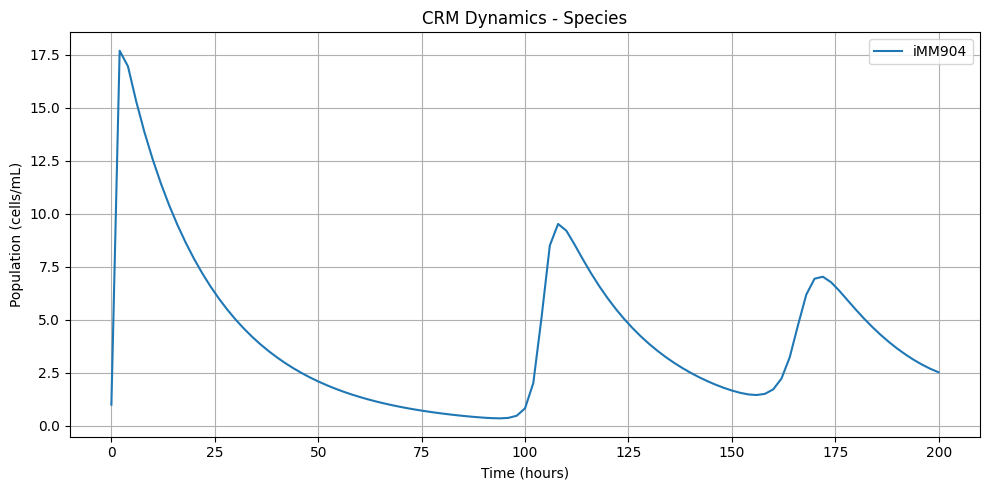

In [25]:
result_df = run_basico_simulation_from_antimony(ant_model_str, duration=200)

# Plot both populations and resource concentrations
plot_species_and_resources(result_df, species_names, resource_names)

In [26]:
resource_names

['EX_glc__D_e', 'EX_nh4_e', 'EX_o2_e', 'EX_pi_e', 'EX_so4_e']

In [12]:
result_df

,iMM904,EX_glc__D_e,EX_nh4_e,EX_o2_e,EX_pi_e,EX_so4_e
Time,,,,,,
0.0,1.000000,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000
2.0,17.701157,6.267378e-07,0.674170,3.629780e-01,6.776591,7.097703
4.0,16.966647,-1.143764e-12,0.028368,5.675345e-03,7.688082,8.359614
6.0,15.310939,3.157805e-15,0.001732,1.387055e-04,8.227513,9.011768
8.0,13.852318,-1.043951e-13,0.000153,5.347455e-06,8.551644,9.323323
...,...,...,...,...,...,...
192.0,3.367273,-3.470761e-14,0.034968,3.409501e-11,9.694648,9.880834
194.0,3.114807,3.871836e-13,0.044179,3.597600e-11,9.718097,9.889967
196.0,2.889899,8.792809e-13,0.058973,4.070306e-11,9.739226,9.898197


In [15]:
save_antimony_as_sbml(ant_model_str, "crm_gsmm.xml", "/Users/edwin/Downloads/")

SBML model saved as '/Users/edwin/Downloads/crm_gsmm.xml'
